In [2]:
import pandas as pd
data = pd.read_excel("STRESS.xlsx")
data.head()

,AGE,COHES,ESTEEM,GRADES,SATTACH,STRESS,NEWID
0,11,61.256001,32.0,15.0,21.0,0,5
1,14,49.000000,33.0,17.0,22.0,0,6
2,14,35.000000,27.0,15.0,28.0,0,10
3,11,74.000000,34.0,14.0,33.0,0,15
4,14,58.000000,29.0,15.0,28.0,0,16


# Task 1

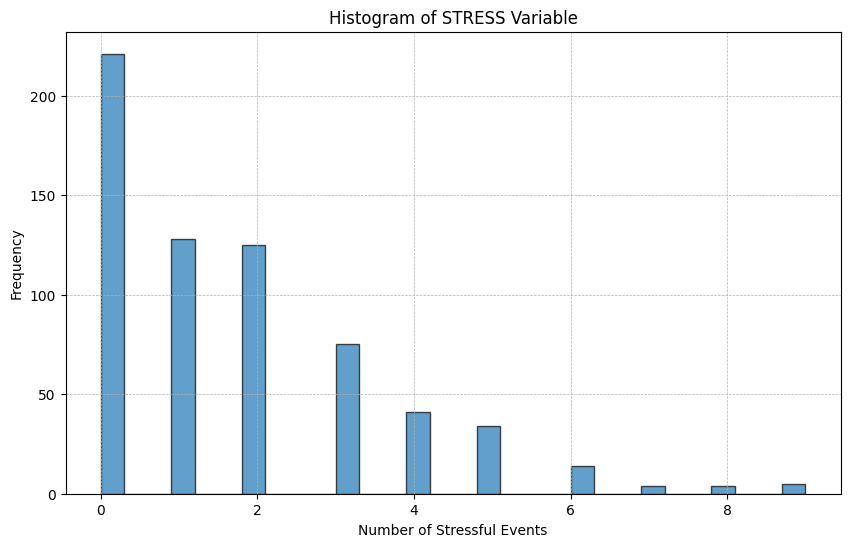

count    651.000000
mean       1.729647
std        1.849082
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        9.000000
Name: STRESS, dtype: float64

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['STRESS'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of STRESS Variable')
plt.xlabel('Number of Stressful Events')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
summary_statistics = data['STRESS'].describe()
summary_statistics


`STRESS` variable:

- **Count**: 651 observations
- **Mean**: Approximately 1.73 stressful events
- **Standard Deviation**: Approximately 1.85
- **Minimum**: 0 stressful events
- **25th Percentile**: 0 stressful events
- **Median (50th Percentile)**: 1 stressful event
- **75th Percentile**: 3 stressful events
- **Maximum**: 9 stressful events

<Figure size 1000x600 with 0 Axes>

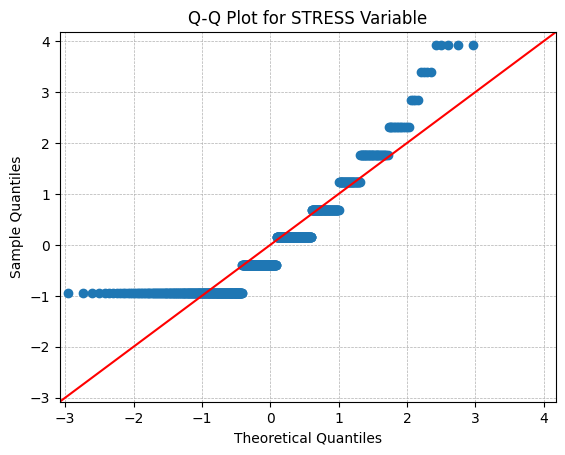

In [6]:
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
sm.qqplot(data['STRESS'], line='45', fit=True)
plt.title('Q-Q Plot for STRESS Variable')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Q-Q plot:

- The data points deviate from the 45-degree reference line, especially at the lower and upper ends.
- Such a deviation suggests that the `STRESS` variable may not be normally distributed.

Considering the histogram and the Q-Q plot:

- The `STRESS` variable does not seem to be normally distributed. It has a right-skewed shape in the histogram, and the Q-Q plot further supports this observation.
- Given that the `STRESS` variable represents counts of stressful events, it's logical to think that its distribution might follow a Poisson or a related distribution. The Poisson distribution is commonly used to model count data, especially when the counts are relatively small.

In conclusion, the most likely probability distribution for the `STRESS` variable seems to be a Poisson distribution. This is based on the nature of the data (count data), the shape of the histogram (right-skewed), and the Q-Q plot's deviation from the 45-degree reference line.

# Task 2

In [7]:
import statsmodels.formula.api as smf
model = smf.ols(formula="STRESS ~ COHES + ESTEEM + GRADES + SATTACH", data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 STRESS   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     14.65
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.83e-11
Time:                        11:52:08   Log-Likelihood:                -1295.1
No. Observations:                 651   AIC:                             2600.
Df Residuals:                     646   BIC:                             2623.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7128      0.581      9.830      0.000       4.572       6.854
COHES         -0.0232      0.007     -3.298      0.001      -0.037      -0.009
ESTEEM        -0.0413      0.019     -2.136      0.033      -0.079      -0.003
GRADES        -0.0417      0.024     -1.773      0.077      -0.088       0.004
SATTACH       -0.0304      0.014     -2.154      0.032      -0.058      -0.003
==============================================================================
Omnibus:                      109.042   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.611
Skew:                           1.087   Prob(JB):                     8.96e-38
Kurtosis:                       4.252   Cond. No.                         584.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here are the results from the OLS regression model:

**Overall Fit**:
- \( R^2 \): 0.083 - This indicates that approximately 8.3% of the variance in `STRESS` is explained by the model.
- Adjusted \( R^2 \): 0.078
- F-statistic: 14.65 with a significance level of \( p < 0.001 \), which suggests that at least one of the predictors is statistically significant in explaining the variation in `STRESS`.

**Coefficients**:
- **Intercept**: 5.7128
- **COHES**: -0.0232 (p < 0.001)
- **ESTEEM**: -0.0413 (p = 0.033)
- **GRADES**: -0.0417 (p = 0.077)
- **SATTACH**: -0.0304 (p = 0.032)

All predictors, except for `GRADES` (which is marginally non-significant at the 0.05 level), are statistically significant.

**Model Diagnostics**:
- The Omnibus test has a low p-value, indicating that the residuals may not be normally distributed.
- The Jarque-Bera (JB) test also indicates potential non-normality of residuals.
- The Durbin-Watson statistic (close to 2) suggests that there is no significant autocorrelation in the residuals.

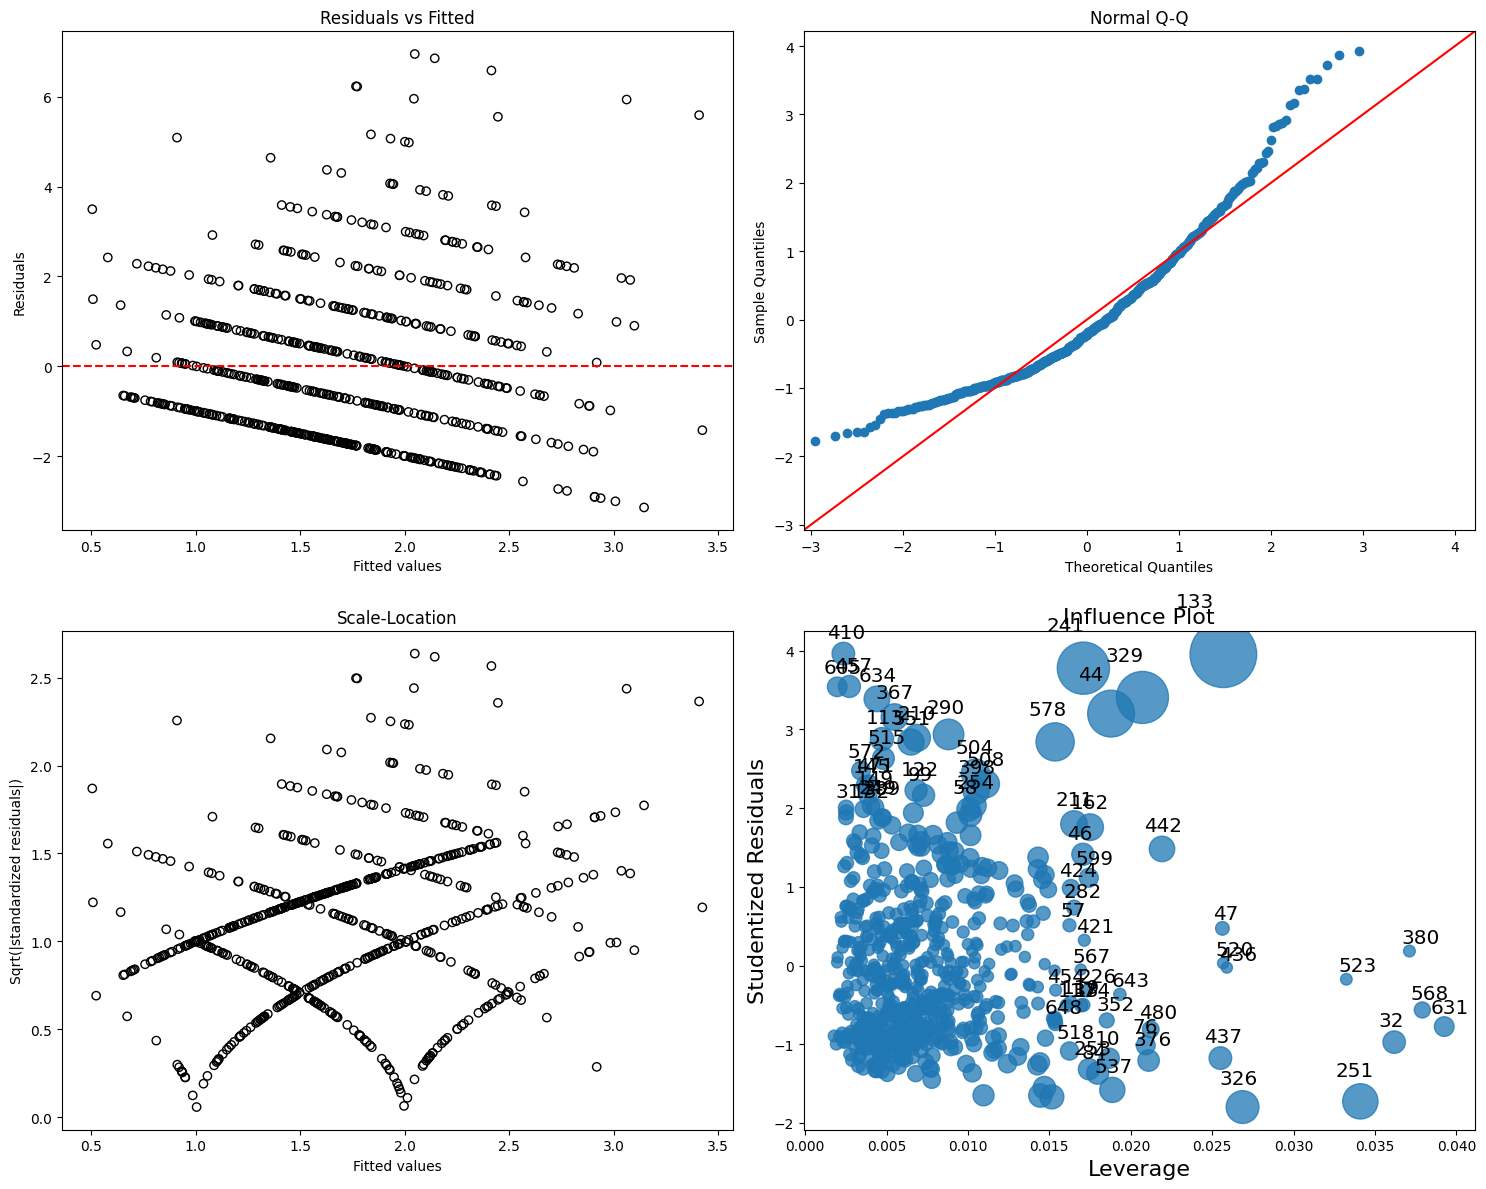

In [8]:

fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax[0, 0].scatter(results.fittedvalues, results.resid, edgecolors = 'k', facecolors = 'none')
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].axhline(y = 0, color = 'red', linestyle = '--')
sm.qqplot(results.resid, line='45', fit=True, ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')
ax[1, 0].scatter(results.fittedvalues, abs(results.resid)**0.5, edgecolors = 'k', facecolors = 'none')
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
sm.graphics.influence_plot(results, criterion="cooks", ax=ax[1, 1])

plt.tight_layout()
plt.show()


## Plots:

1. **Residuals vs. Fitted Values**: This plot checks the assumptions of linearity and homoscedasticity (equal variance of residuals). The residuals seem to have a pattern, and they don't seem to be randomly distributed around zero. This suggests potential non-linearity and potential heteroscedasticity.

2. **Normal Q-Q Plot**: This plot checks the assumption of normality of residuals. The deviation from the 45-degree line, especially at the tails, suggests that the residuals may not be normally distributed.

3. **Scale-Location Plot**: This plot checks the assumption of homoscedasticity. There seems to be a slight funnel shape, suggesting potential heteroscedasticity.

4. **Leverage vs. Residuals Squared**: This plot checks for influential points. There are a few points outside the Cook's distance lines, indicating potential influential observations.

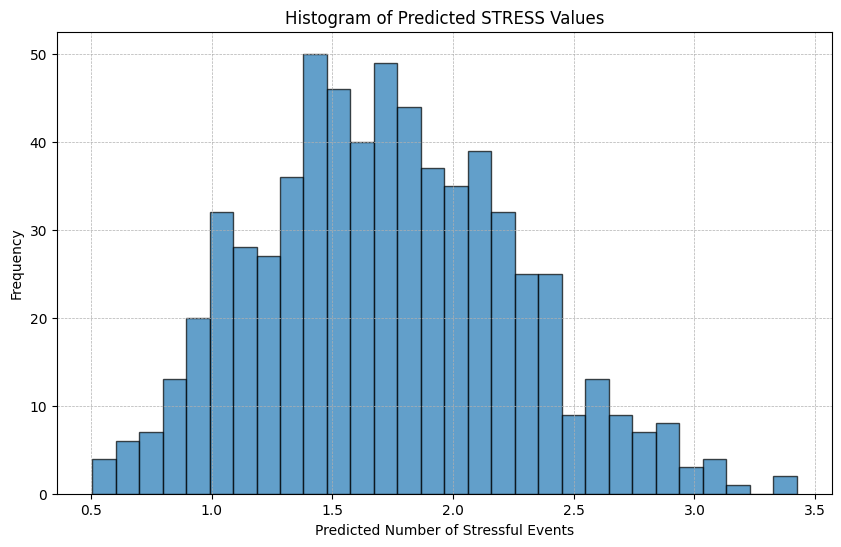

In [9]:
y_hat = results.fittedvalues
plt.figure(figsize=(10, 6))
plt.hist(y_hat, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Predicted STRESS Values')
plt.xlabel('Predicted Number of Stressful Events')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The histogram shows the distribution of predicted values (\( \hat{Y} \)) from the OLS regression model.

Observations from the histogram:
- The predicted values are continuous, whereas the actual `STRESS` variable is a count variable with discrete values.
- The distribution of the predicted values has a somewhat bell-shaped form but is slightly right-skewed.
- There are predicted values that fall below zero, which is not meaningful in the context of counting stressful events.

Issues:
- The continuous nature of the predicted values doesn't align with the discrete count nature of the actual `STRESS` variable. This is a fundamental issue with using OLS regression for count data.
- The presence of negative predicted values is problematic as it's not possible to have a negative count of stressful events.
- The diagnostic plots and tests suggest potential violations of OLS assumptions, including non-linearity, heteroscedasticity, and non-normality of residuals.

Given these observations, it's evident that an OLS regression might not be the most suitable modeling approach for this data. A count-based regression model, such as Poisson regression or a Zero-Inflated Poisson regression, might be more appropriate.